### Decision Tree Classifier fitted by cross validation

 1. Clean the data: Add target variable and remove redundant variable
 2. Cross validation over train+validation set combined, choose optimal model in termos of 0-1 loss for different size trees
 3. Measure accuracy over test set and AUC

### Load train, val and test sets for binary class and multiclass

In [1]:
import numpy as np
import pandas as pd
import os

os.chdir('/Users/bwilliams/GoogleDrive/UniversityOfHelsinki/Fall2020/IML/TeamProject/TermProjectIML/bin')
from SplitData import *


In [2]:
X_train

,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,Glob.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
date,,,,,,,,,,,,,,,,,,,,,
2003-10-25,373.167283,1.431870,373.126593,1.448713,373.451099,1.461289,373.086154,1.455536,43.535365,27.426272,...,-3.715529,0.454747,-3.044745,0.455000,3.298496,1.980940,0.082656,0.055700,0.000811,0.000220
2009-06-12,380.819263,3.750134,381.104084,3.842825,384.138368,10.421258,381.256526,3.935310,307.787950,274.959512,...,15.760444,2.557582,16.337925,3.655239,18.522389,15.400918,0.859803,0.839175,0.004687,0.001002
2000-04-11,381.437442,7.281159,381.380405,7.236002,381.926532,7.294374,381.381156,7.208287,68.364653,48.560722,...,1.753414,0.340565,2.524931,0.414255,4.945162,3.405652,0.224159,0.192014,0.003710,0.001209
2006-05-17,374.112809,1.311766,374.186461,1.165742,374.626348,1.384366,374.245112,1.106004,383.959597,264.682534,...,6.330964,2.678859,7.171760,3.419958,19.584386,13.972122,0.700820,0.613468,0.001818,0.000504
2010-11-18,396.130000,0.737456,396.084375,0.680965,396.437143,0.754506,396.060469,0.683470,13.648889,6.731350,...,-5.064058,0.277401,-4.456836,0.283046,1.183899,0.516997,0.032203,0.015956,0.000841,0.000085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-06-29,383.500368,9.304334,383.808158,9.221770,384.266789,9.970131,383.801684,9.120496,380.381884,278.025820,...,18.034885,1.616088,19.121185,2.327019,22.156684,16.132505,1.107248,0.982572,0.004367,0.001248
2011-05-27,390.670829,2.868148,391.061823,2.980363,392.067500,6.783506,391.174199,2.969665,192.559104,154.908965,...,8.904982,1.737851,9.242527,2.819482,12.064562,9.504571,0.576818,0.528440,0.003284,0.001672
2006-03-16,381.961102,0.669413,381.946695,0.653433,382.525424,0.725250,381.866610,0.639209,261.706822,151.088505,...,-3.997316,3.865675,-2.984901,4.175962,12.663874,7.402219,0.365315,0.262647,0.004529,0.000452


### Fit binary classification DT

Accuracy on Train: 0.8837209302325582
Cross validation Accuracy:  0.8400840336134452 {'max_depth': 2}


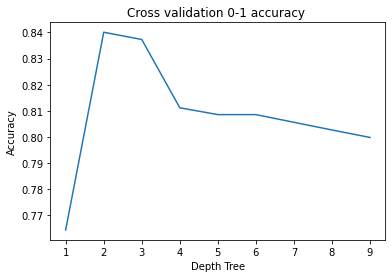

Accuracy on Test: 0.8837209302325582


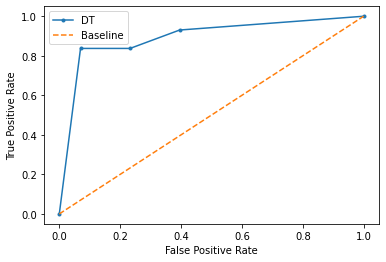

In [3]:
#####################################

from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics

# https://stackoverflow.com/questions/35097003/cross-validation-decision-trees-in-sklearn
parameters = {'max_depth':range(1,10)}
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), parameters, n_jobs=4, cv=10)
clf.fit(X=X_trainval, y=y_trainval_bin)
tree_model = clf.best_estimator_

y_pred_train = tree_model.predict(X_trainval)

print("Accuracy on Train:",metrics.accuracy_score(y_trainval_bin, y_pred_train))

print ('Cross validation Accuracy: ', clf.best_score_, clf.best_params_) 

cv_accuracy = clf.cv_results_['mean_test_score']
plt.plot(range(1,10) ,cv_accuracy)
plt.title('Cross validation 0-1 accuracy ')
plt.xlabel('Depth Tree')
plt.ylabel('Accuracy')
plt.show()

y_pred = tree_model.predict(X_test)
# probabilities of class event
y_pred_proba = tree_model.predict_proba(X_test)[:,0]

print("Accuracy on Test:",metrics.accuracy_score(y_test_bin, y_pred))

y_test_01 = pd.get_dummies(y_test_bin)['event']

fpr, tpr, thresholds = metrics.roc_curve(y_test_01, y_pred_proba)
metrics.auc(fpr, tpr)

plt.plot(fpr,tpr , marker='.', label='DT')
plt.plot(fpr, fpr, linestyle='--', label='Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

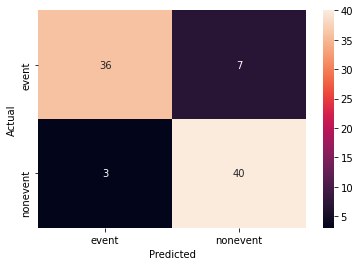

In [6]:
import seaborn as sns
confusion_matrix = pd.crosstab(y_test_bin, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

### Tree visualization binary class

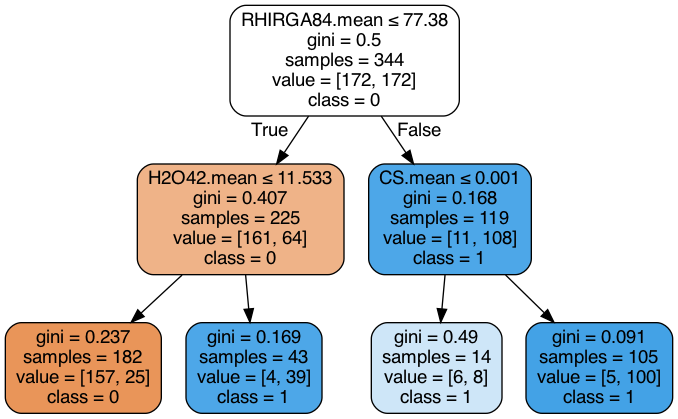

In [7]:
# Tree visualization
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

feature_cols = X_trainval.columns
dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('data/tree1.png')
Image(graph.create_png())



### Multiclass classification DT

Accuracy on Train: 0.6598837209302325
Cross validation Accuracy:  0.6421848739495799 {'max_depth': 2}


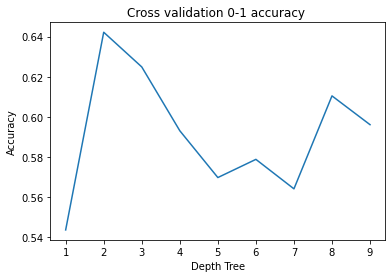

Accuracy on Test: 0.6744186046511628


In [8]:
#####################################

from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics

# https://stackoverflow.com/questions/35097003/cross-validation-decision-trees-in-sklearn
parameters = {'max_depth':range(1,10)}
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), parameters, n_jobs=4, cv=10)
clf.fit(X=X_trainval, y=y_trainval)
tree_model = clf.best_estimator_

y_pred_train = tree_model.predict(X_trainval)

print("Accuracy on Train:",metrics.accuracy_score(y_trainval, y_pred_train))

print ('Cross validation Accuracy: ', clf.best_score_, clf.best_params_) 

cv_accuracy = clf.cv_results_['mean_test_score']
plt.plot(range(1,10) ,cv_accuracy)
plt.title('Cross validation 0-1 accuracy ')
plt.xlabel('Depth Tree')
plt.ylabel('Accuracy')
plt.show()

y_pred = tree_model.predict(X_test)
# probabilities of class event
y_pred_proba = tree_model.predict_proba(X_test)[:,0]

print("Accuracy on Test:",metrics.accuracy_score(y_test, y_pred))


### Confusion matrix and decision tree

The confusion matrix shows that a 2 level decision tree classifes all observations into **nonevent** or into **lb**. By looking at the tree plot, we can see that at most a 2 level tree can classify into 3 classes. And the class lf lI is unlikely to be classified, because very few observations in training got into that leaf node. 

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

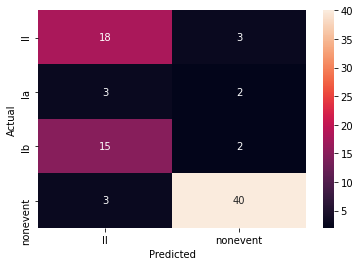

In [11]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)



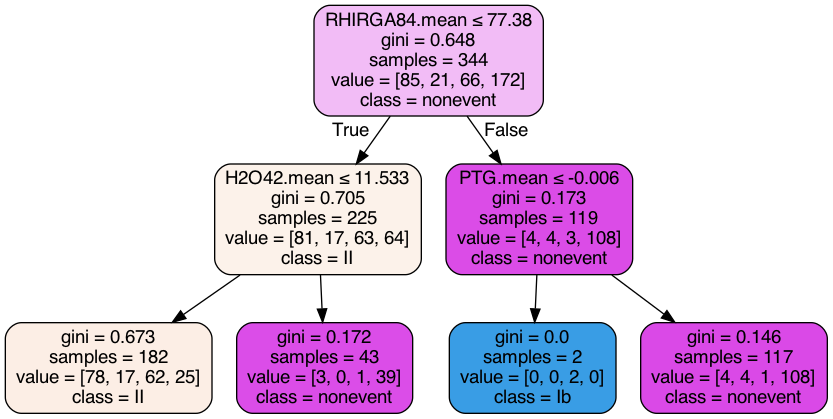

In [12]:
# Tree visualization
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = X_trainval.columns
dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names = sorted(y_trainval.unique()))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('data/tree1.png')
Image(graph.create_png())
